
Overall Accuracy: 0.6094

Classification Report (per-class):
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         2
           4      0.000     0.000     0.000        11
           5      0.699     0.750     0.723       136
           6      0.613     0.570     0.591       128
           7      0.452     0.475     0.463        40
           8      0.200     0.333     0.250         3

    accuracy                          0.609       320
   macro avg      0.327     0.355     0.338       320
weighted avg      0.601     0.609     0.604       320

Confusion matrix (counts):
 [[  0   0   1   1   0   0]
 [  0   0   5   6   0   0]
 [  1   3 102  26   3   1]
 [  0   2  31  73  19   3]
 [  0   2   7  12  19   0]
 [  0   0   0   1   1   1]]


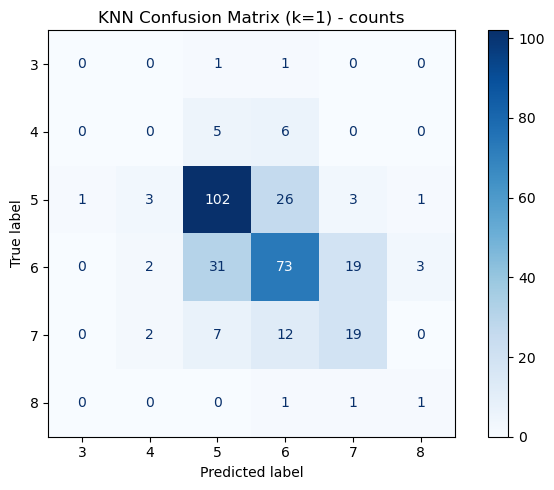

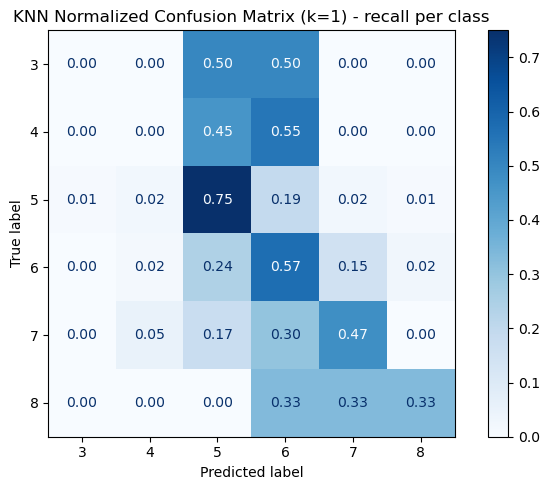

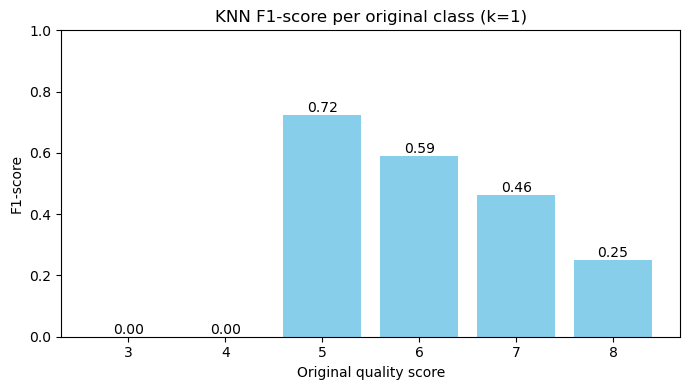

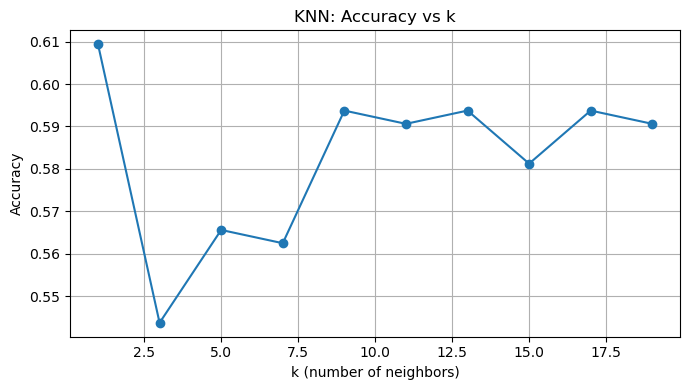

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    ConfusionMatrixDisplay
)

#read data
df = pd.read_csv("winequality-red.csv", sep=";", engine="python", quotechar='"')

X = df.drop(["quality"], axis=1)#feature values
Y = df["quality"]   #output

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=5, stratify=Y #we need to stratify because the dataset is imbalanced
)

k =1
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),#need to standardize all features
    ("knn", KNeighborsClassifier(n_neighbors=k))
])

knn_pipeline.fit(X_train, Y_train)
Y_pred = knn_pipeline.predict(X_test)

acc = accuracy_score(Y_test, Y_pred)
print(f"\nOverall Accuracy: {acc:.4f}\n")

print("Classification Report (per-class):")
print(classification_report(Y_test, Y_pred, digits=3))

labels = sorted(df["quality"].unique())  # e.g. [3,4,5,6,7,8]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)
print("Confusion matrix (counts):\n", cm)

plt.figure(figsize=(7,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format="d", ax=plt.gca())
plt.title(f"KNN Confusion Matrix (k={k}) - counts")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

cm_norm = confusion_matrix(Y_test, Y_pred, labels=labels, normalize="true")
plt.figure(figsize=(7,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=labels)
disp.plot(cmap="Blues", values_format=".2f", ax=plt.gca())
plt.title(f"KNN Normalized Confusion Matrix (k={k}) - recall per class")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

report = classification_report(Y_test, Y_pred, output_dict=True)
# report keys are strings of labels, so convert labels to str
f1_scores = [report[str(l)]["f1-score"] if str(l) in report else 0.0 for l in labels]

plt.figure(figsize=(7,4))
plt.bar([str(l) for l in labels], f1_scores, color="skyblue")
plt.ylim(0,1)
plt.xlabel("Original quality score")
plt.ylabel("F1-score")
plt.title(f"KNN F1-score per original class (k={k})")
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center")
plt.tight_layout()
plt.show()

#hyperparameter tuning
k_values = list(range(1, 21, 2))  # odd k from 1 to 19
accuracies = []
for kv in k_values:
    p = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=kv))])
    p.fit(X_train, Y_train)
    pred = p.predict(X_test)
    accuracies.append(accuracy_score(Y_test, pred))

plt.figure(figsize=(7,4))
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN: Accuracy vs k")
plt.grid(True)
plt.tight_layout()
plt.show()


